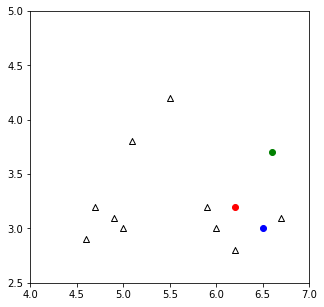

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

UBIT = 'rohanhem';
np.random.seed(sum([ord(c) for c in UBIT]))

input_data = [[5.9,3.2],[4.6,2.9],[6.2,2.8],[4.7,3.2],[5.5,4.2],[5.0,3.0],[4.9,3.1],[6.7,3.1],[5.1,3.8],[6.0,3.0]]
np.savetxt('data.csv', input_data, fmt='%.2f', delimiter=',', header="x,  y,")

k = 3


centroids={1:[6.2,3.2],2:[6.6,3.7],3:[6.5,3.0]}
fig = plt.figure(figsize=(5, 5))
plt.scatter(data['x'], data['y'], marker='^',facecolor='white', edgecolor='black', color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(4, 7)
plt.ylim(2.5, 5)
plt.show()
#fig.savefig('plot.png')




0    1
1    1
2    3
3    1
4    2
5    1
6    1
7    3
8    1
9    1
Name: closest, dtype: int64


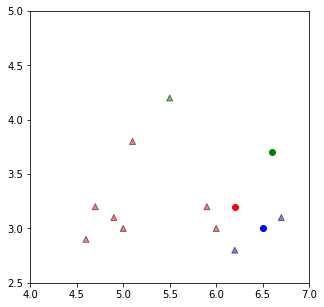

In [0]:
def assign(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assign(df, centroids)
print(df['closest'])

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, marker='^', edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(4, 7)
plt.ylim(2.5, 5)
# plt.show()
fig.savefig('task3_iter1_a.jpg')

{1: [5.171428571428572, 3.1714285714285713], 2: [5.5, 4.2], 3: [6.45, 2.95]}


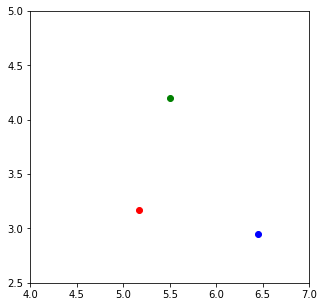

In [0]:
import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

centroids = update(centroids)
print (centroids)
fig1 = plt.figure(figsize=(5, 5))
#plt.scatter(df['x'], df['y'], marker='^',facecolor='white', edgecolor='black', color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(4, 7)
plt.ylim(2.5, 5)
plt.show()
fig1.savefig('task3_iter1_b.jpg')

0    3
1    1
2    3
3    1
4    2
5    1
6    1
7    3
8    2
9    3
Name: closest, dtype: int64


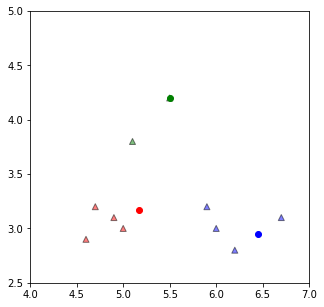

{1: [4.800000000000001, 3.05], 2: [5.3, 4.0], 3: [6.2, 3.025]}


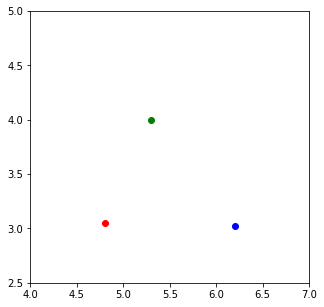

In [0]:
data = assign(data, centroids)
print(data['closest'])
# Plot results
fig2 = plt.figure(figsize=(5, 5))
plt.scatter(data['x'], data['y'], color=data['color'], alpha=0.5, marker='^', edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(4, 7)
plt.ylim(2.5, 5)
plt.show()
fig2.savefig('task3_iter2_a.jpg')

centroids = update(centroids)
print (centroids)
fig1 = plt.figure(figsize=(5, 5))
#plt.scatter(data['x'], data['y'], marker='^',facecolor='white', edgecolor='black', color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(4, 7)
plt.ylim(2.5, 5)
plt.show()
fig1.savefig('task3_iter2_b.jpg')